In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.initializers import HeNormal
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer



In [ ]:
from keras.applications.resnet import ResNet50, decode_predictions

In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/ResNet Data/"
print(pathToData + "trainRes_X.p")
pathToModels = "drive/MyDrive/CS 230 Final Project/SavedModelsFromTraining/"
print(pathToModels)

drive/MyDrive/CS 230 Final Project/ResNet Data/trainRes_X.p
drive/MyDrive/CS 230 Final Project/SavedModelsFromTraining/


In [ ]:
mlb = MultiLabelBinarizer()
# load the train dataset
X_train = pickle.load(open(pathToData+"trainRes_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"trainRes_Y.p", 'rb'))
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_dev = pickle.load(open(pathToData+"devRes_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"devRes_Y.p", 'rb'))
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_test = pickle.load(open(pathToData+"testRes_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"testRes_Y.p", 'rb'))
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)

(4246, 224, 224, 3)
(4246, 3)
(910, 224, 224, 3)
(910, 3)
(910, 224, 224, 3)
(910, 3)


In [ ]:
print(y_trainUnflat)

[0 2 1 ... 0 1 0]


In [ ]:
numExamples = X_train.shape[0]
print(numExamples)

4246


In [ ]:
print(X_train.shape[1:])

(224, 224, 3)


In [ ]:
print(X_train.shape[1:])

(224, 224, 3)


In [ ]:
model = ResNet50(weights="imagenet")

In [ ]:
first_layer_weights = model.layers[2].get_weights()
print(first_layer_weights)

In [ ]:
predictions = Dense(3, activation='softmax')(model.layers[-2].output)
newModel = Model(inputs=model.input, outputs=predictions)


In [ ]:
counter = 0
for layer in newModel.layers:
  counter += 1
print(counter)

for layer in newModel.layers[:59]:
  layer.trainable = False

countFalse = 0
countTrue = 0
for layer in newModel.layers:
  if layer.trainable == False:
    countFalse += 1
  if layer.trainable == True:
    countTrue += 1
print(countFalse)
print(countTrue)

177
59
118


In [ ]:
newModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
first = newModel.layers[2].get_weights()
print(first)

In [ ]:
batchSizes = [100, 64, 32]
numEpochs = 50
print(batchSizes)

[100, 64, 32]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

In [ ]:
for batchSize in batchSizes:
  print("BatchSize : ", batchSize)

  firstPart = pathToModels+"Model8weights_"+str(batchSize)
  checkpoint_filepath = firstPart+'.{epoch:02d}-{val_loss:.2f}.h5'
  print(checkpoint_filepath)
  model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)



  newModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = newM+++++++odel.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev), callbacks=[model_checkpoint_callback])
  historyDict = history.history
  #print(historyDict.keys())
  trainAccuracy.append(historyDict['categorical_accuracy'])
  valAccuracy.append(historyDict['val_categorical_accuracy'])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  100
drive/MyDrive/CS 230 Final Project/SavedModelsFromTraining/Model8weights_100.{epoch:02d}-{val_loss:.2f}.h5
Epoch 1/50
43/43 [==============================] - ETA: 0s - loss: 1.1481 - categorical_accuracy: 0.5582

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


43/43 [==============================] - 90s 2s/step - loss: 1.1481 - categorical_accuracy: 0.5582 - val_loss: 46.5043 - val_categorical_accuracy: 0.4747
Epoch 2/50
43/43 [==============================] - 61s 1s/step - loss: 0.4725 - categorical_accuracy: 0.8231 - val_loss: 11.7039 - val_categorical_accuracy: 0.2022
Epoch 3/50
43/43 [==============================] - 63s 1s/step - loss: 0.2342 - categorical_accuracy: 0.9129 - val_loss: 1.6021 - val_categorical_accuracy: 0.5714
Epoch 4/50
43/43 [==============================] - 64s 1s/step - loss: 0.1367 - categorical_accuracy: 0.9515 - val_loss: 0.9571 - val_categorical_accuracy: 0.7582
Epoch 5/50
43/43 [==============================] - 61s 1s/step - loss: 0.1011 - categorical_accuracy: 0.9640 - val_loss: 2.5696 - val_categorical_accuracy: 0.6154
Epoch 6/50
43/43 [==============================] - 61s 1s/step - loss: 0.0795 - categorical_accuracy: 0.9722 - val_loss: 1.5714 - val_categorical_accuracy: 0.7341
Epoch 7/50
43/43 [=======

In [ ]:
best100 = load_model(pathToModels+"Model8weights_100.20-0.50.h5") #batch size 100, epoch 20 gave lowest non-overfit dev loss


In [ ]:
predictions100 = best100.predict(X_test)


In [ ]:
# print(predictions)
# print(y_test)
yTestNew = y_test.argmax(axis=1)
yPredNew100 = predictions100.argmax(axis=1)

print(yTestNew)
print(yPredNew100)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

0.8897954182258889


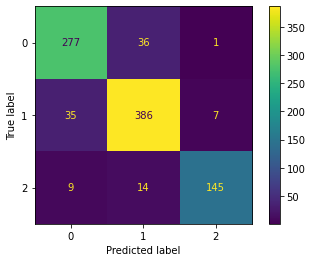

In [ ]:
#For Model batch size 100

cM = confusion_matrix(yTestNew,yPredNew100)

displayClasses = [i for i in range(3)]

print(f1_score(yTestNew, yPredNew100, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()